# HOMEWORK

## 1. LAB

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Récupére les données

#sep= '\t' being tab.
df=pd.read_csv('data_ffnn_3classes.txt', sep= ' ', names = ['x1', 'x2','y'])
df.head()

,x1,x2,y
0,1.9643,4.5957,1.0
1,2.2753,3.8589,1.0
2,2.9781,4.5651,1.0
3,2.9320,3.5519,1.0
4,3.5772,2.8560,1.0


In [3]:
#training
#transposée des matrices X et Y
X = np.array([df['x1'],df['x2']])
X= X.T
Y = np.array([df['y']])
Y=Y.T
print(X,'\n',Y)


[[1.9643 4.5957]
 [2.2753 3.8589]
 [2.9781 4.5651]
 [2.932  3.5519]
 [3.5772 2.856 ]
 [4.015  3.1937]
 [3.3814 3.4291]
 [3.9113 4.1761]
 [2.7822 4.0431]
 [2.5518 4.6162]
 [3.3698 3.9101]
 [3.1048 3.0709]
 [1.9182 4.0534]
 [2.2638 4.3706]
 [2.6555 3.5008]
 [3.1855 4.2888]
 [3.6579 3.8692]
 [3.9113 3.4291]
 [3.6002 3.1221]
 [3.0357 3.3165]
 [1.5841 3.3575]
 [2.0103 3.2039]
 [1.9527 2.7843]
 [2.2753 2.7127]
 [2.3099 2.9584]
 [2.8283 2.6309]
 [3.0473 2.2931]
 [2.4827 2.0373]
 [2.5057 2.3853]
 [1.8721 2.0577]
 [2.0103 2.3546]
 [1.2269 2.3239]
 [1.8951 2.9174]
 [1.561  3.0709]
 [1.5495 2.6923]
 [1.6878 2.4057]
 [1.4919 2.0271]
 [0.962  2.682 ]
 [1.1693 2.9276]
 [0.8122 2.9992]
 [0.9735 3.3881]
 [1.25   3.1937]
 [1.3191 3.5109]
 [2.2292 2.201 ]
 [2.4482 2.6411]
 [2.7938 1.9656]
 [2.0909 1.6177]
 [2.5403 2.8867]
 [0.9044 3.0198]
 [0.7661 2.5899]
 [0.0864 4.1045]
 [4.6236 2.211 ]
 [4.2382 1.6094]
 [5.2964 1.5612]
 [3.9732 1.2429]
 [4.4475 1.3257]
 [3.6365 2.1778]
 [5.2574 1.5792]
 [4.6737 1.818

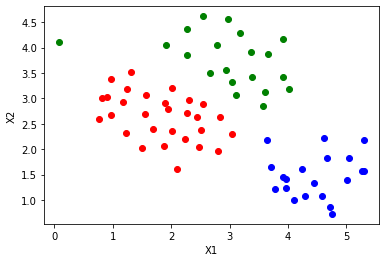

In [4]:
#Graph de données en fonction des valeurs de y
#Scatter = points indépendants entre eux

#y=1
plt.scatter(df['x1'][1:20], df['x2'][1:20], c='green')
plt.scatter(df['x1'][50], df['x2'][50], c='green')

#y=0
plt.scatter(df['x1'][21:50], df['x2'][21:50], c='red')

#y=2
plt.scatter(df['x1'][51:71], df['x2'][51:71], c='blue')

#Nom des axes
plt.xlabel("X1")
plt.ylabel("X2")

#Affichage
plt.show()

In [5]:
#Initiation des parametres et fonctions

#I = number of training examples
I = 71

#N = number of features
N = 2

#J = number of layers
J = 3

#K = (au choix)number of hidden neurons
K= 15

#Error
Error = []

#Hidden layer
V = np.random.randn(N+1, K)

#Output layers
W= np.random.randn(K+1,J)

#Fonction Intercept
#We decide that the intercept will be equivalent to a value of 1
#So we need to add a column of 1 at the beginning of our matrice
def Intercept(X):
    c = np.ones([len(X),1])
    X = np.append(c, X, axis = 1)
    return X

X_I = Intercept(X)
print(X_I)

#Fonction FFNN

def Fonction_Sigmoid(X):
    return 1 / (1 + np.exp(-X))

def Derive_Sigmoid(X):
    return Fonction_Sigmoid(X) * (1 - Fonction_Sigmoid(X))



[[1.     1.9643 4.5957]
 [1.     2.2753 3.8589]
 [1.     2.9781 4.5651]
 [1.     2.932  3.5519]
 [1.     3.5772 2.856 ]
 [1.     4.015  3.1937]
 [1.     3.3814 3.4291]
 [1.     3.9113 4.1761]
 [1.     2.7822 4.0431]
 [1.     2.5518 4.6162]
 [1.     3.3698 3.9101]
 [1.     3.1048 3.0709]
 [1.     1.9182 4.0534]
 [1.     2.2638 4.3706]
 [1.     2.6555 3.5008]
 [1.     3.1855 4.2888]
 [1.     3.6579 3.8692]
 [1.     3.9113 3.4291]
 [1.     3.6002 3.1221]
 [1.     3.0357 3.3165]
 [1.     1.5841 3.3575]
 [1.     2.0103 3.2039]
 [1.     1.9527 2.7843]
 [1.     2.2753 2.7127]
 [1.     2.3099 2.9584]
 [1.     2.8283 2.6309]
 [1.     3.0473 2.2931]
 [1.     2.4827 2.0373]
 [1.     2.5057 2.3853]
 [1.     1.8721 2.0577]
 [1.     2.0103 2.3546]
 [1.     1.2269 2.3239]
 [1.     1.8951 2.9174]
 [1.     1.561  3.0709]
 [1.     1.5495 2.6923]
 [1.     1.6878 2.4057]
 [1.     1.4919 2.0271]
 [1.     0.962  2.682 ]
 [1.     1.1693 2.9276]
 [1.     0.8122 2.9992]
 [1.     0.9735 3.3881]
 [1.     1.25   

In [6]:
#Redefinir la matrice Y en 3 colones

Y0 = []
Y1 = []
Y2 = []

Xl = len(X)

for i in range (Xl):
    if Y[i] == 0:
        Y0.append(1)
        Y1.append(0)
        Y2.append(0)
        
    if Y[i] == 1:
        Y0.append(0)
        Y1.append(1)
        Y2.append(0)
        
    if Y[i] == 2:
        Y0.append(0)
        Y1.append(0)
        Y2.append(1)
        
Y = np.c_[np.c_[Y0,Y1],Y2]
        
     


print(Y)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [7]:
#Forward Propagation

#X_bb = Matrice X à 2 barres
#F = Matrice F
#F_b = Matrice F barre
#F_bb = Matrice F a 2 barres
#G = Matrice G 

def FWP(X, V, W):
    X_I = Intercept(X)
    X_bb = np.dot(X_I,V)
    F = Fonction_Sigmoid(X_bb)
    F_I = Intercept(F)
    F_bb = np.dot(F_I, W)
    G = Fonction_Sigmoid(F_bb)
    
    return X_I, X_bb,F_I, F_bb, G
    

In [8]:
#Back Propagation

def BP(W,X_bb,X_I, F_I, G,Y):
    # Definition Erreur
    Err = G-Y
    #  Derivée partielle en fonction W
    Ew = np.dot(F_I.T, Err)
    # Derivée partielle en fonction de v
    #W[1:,:] = each column in the second row of W

    dp = np.dot(Err, W[1:,:].T)
    dp =  dp * Derive_Sigmoid(X_bb)
    Ev = np.dot(X_I.T, dp)
    
    return Err, Ew, Ev
    

In [15]:
#Entrainement du model
for i in range(15000):
    
    X_I,X_bb,F_I,F_bb,G = FWP(X, V, W)
    Err, Ew, Ev = BP(W,X_bb,X_I,F_I,G,Y)
    V = V - 0.001*Ev
    W = W - 0.001*Ew
     
    Error.append(np.mean(np.abs(Err)))

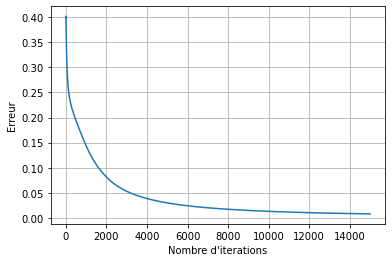

In [10]:
plt.plot(Error)
plt.xlabel("Nombre d'iterations")
plt.ylabel("Erreur")
plt.grid()
plt.show()

In [11]:
#5)What are the optimal parameter values for the hidden layer (v) and for the output layer (ω)?
print("The optimal parameter values for the hidden layer are:\n", V)
print("\nThe optimal parameter values for the output layer are:\n", W)


The optimal parameter values for the hidden layer are:
 [[-2.44143015 -0.6310815   1.60108529  0.27135486 -0.02891559 -0.11814459
  -4.32168447 -8.37009014 -5.2796783  -6.7736328  -0.86014981  5.66592555
   1.37794924  4.25096357  2.0745892 ]
 [ 0.2904319  -0.59173516 -2.40812569  3.74865147  2.33472005  1.92611667
   1.34496047  0.56228768  1.84231927  0.38267318 -2.96142649 -0.3018505
   1.8207369  -1.35482867 -2.92589559]
 [ 0.75775279 -1.24211541  3.06856012 -0.68435295 -0.21148459 -3.01207369
   0.33134651  2.22634994  0.17073135  1.86721976  0.72843092 -1.58886255
  -3.63805159 -0.27507462  3.60055441]]

The optimal parameter values for the output layer are:
 [[-0.94302348 -2.5853972  -0.30523536]
 [-3.37489817  0.80856215  0.33783423]
 [ 0.33051456  0.02219367 -0.46083885]
 [ 2.83948536  0.79442382 -3.39543535]
 [ 3.10233646 -3.82082276 -0.70799087]
 [ 0.51453108 -2.05201563 -0.11650863]
 [-1.59976357 -1.87450812  3.59933767]
 [-3.36044509  3.58581615  0.75688975]
 [-7.26235544 

In [12]:
#6)  Show that your classifier works properly by comparing the predicted output values to the actual training output values.
Xc_b, Xc_bb, Fc_b, Fc_bb, Gc = FWP(X, V, W)

Ye = []
for i in range(Xl ):
    max = 0
    for j in range(J ):
         if Gc[i][j] > max:
                max = Gc[i][j]
                val = j
    Ye.append(val)
        


comparaison = np.array([Ye,df['y']]).T
print(comparaison)


[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]]


In [13]:
#7) Test your optimized model by doing forward propagation over the following test data set: (x1, x2)=(2, 2), (x1, x2)=(4, 4), and (x1, x2)=(4.5, 1.5).

X_test = np.array([[2, 2], [4, 4], [4.5, 1.5]])
X_testb, X_testbb, F_testb, F_testbb, Gt = FWP(X_test, V, W)

Y_test= []
for i in range(len(X_test)):
    max = 0
    for j in range(J):
         if Gt[i][j] > max:
                max = Gt[i][j]
                val = j
    Y_test.append(val)
        

print("Y_test:",Y_test)


Y_test: [0, 1, 2]
